In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['CCI'] = ta.CCI(df['high'], df['low'], df['close'], timeperiod=20)
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['CCI']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)

# X 학습 테스트
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y 학습 테스트
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[22829975.11319121 22801101.47520899 22890933.59038314 22690305.68559398
 22757190.56397078 23203280.44826645 22967210.21790804 22691408.15365148
 22562339.93764476 22898208.09638493 22587189.20993732 23303408.15803973
 22362986.76645469 21826723.79541732 21971953.16646815 21907860.75205313
 21664198.57030655 21986388.35983407 22253945.1192834  22251372.30440273
 22504895.76552003 22609540.88970958 22780028.00413163 22777620.31997189
 22805930.09913252 22752122.83174897 22837017.86217301 22857931.92560997
 22871342.1022107  22960800.34079604 22900279.3130336  22854931.48722237
 22924817.4091717  22832667.08780054 22743774.50115528 22737947.79135353
 22843384.17955662 23470874.91162066 23935950.57915352 23347059.05776886
 23243825.55104133 23145015.75771983 23151762.42579516 23231755.95506517
 24096387.24920629 23838441.9689437  23714224.41634515 23465611.1076979
 23196391.04509059 22784141.37897862 22002058.09204981 21090106.27553384
 21416343.72370635 21979818.12511048 22243995.938716

In [27]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.0007874920799714191 / test : -0.15922702753598528
[MSE] : 0.055
[RMSE] : 0.235


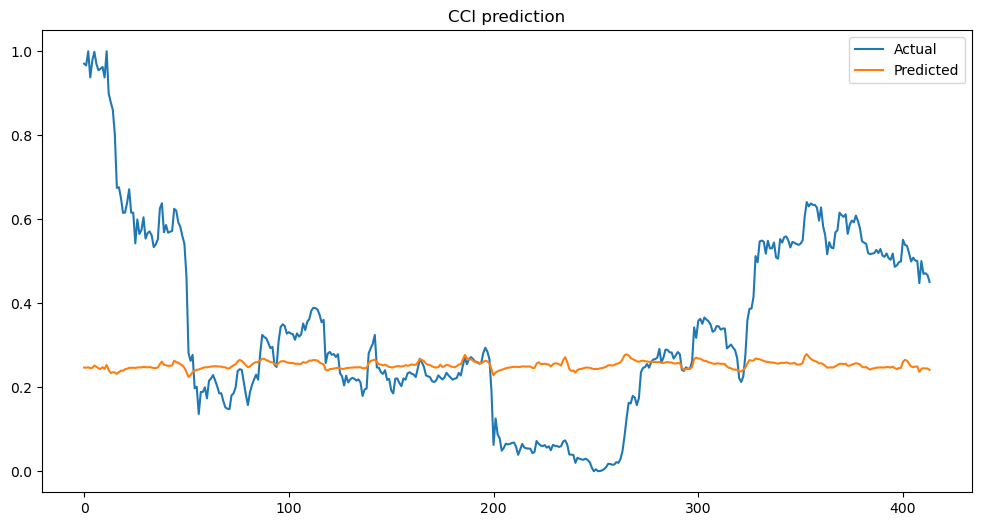

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('CCI prediction')
#plt.axvline(144, 0, 1, color='lightgray', linestyle='--')
plt.legend()
plt.show()